In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import random
from random import randint

In [182]:
def dist(a, b):
    return np.linalg.norm(a - b)

def dist_2d(a,b):
    squared_distance = 0
    for i in range(len(a)):
        squared_distance += (a[i] - b[i])**2
    dist = sqrt(squared_distances)
    return dist

In [183]:
fake_centers = 4

number_of_clusters = fake_centers

In [184]:
def generate_random_clusters(n_features, k):
    c_position = []
    for i in range(n_features):
        c_position.append(np.random.randint(0.8 * np.min(x[:, i]), 0.8 * np.max(x[:, i]), size=k)) 
                                           # 0.8 to stay in the range (it really doesn't matter as this
                                           #                           is random initialization)
    return c_position

In [185]:
n_features = 2
c_positions = generate_random_clusters(n_features, number_of_clusters) 
c_positions = np.array(c_positions)

In [186]:
print(c_positions)

[[ 3  0  3  0]
 [-7  7  2 -8]]


In [187]:
print(x)

[[-2.22184336  9.54322808]
 [-2.93035582  2.09656522]
 [-2.26864184  1.08611059]
 ...
 [-1.3407027   9.36630316]
 [-2.13478719  2.12848153]
 [-1.65362094  8.79790151]]


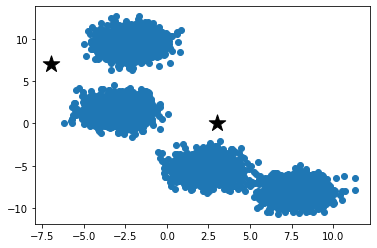

In [188]:
pyplot.scatter(x[:, 0], x[:, 1])
pyplot.scatter(c_positions[:, 0], c_positions[:, 1], marker='*', s=300, c='black')
pyplot.show()

In [189]:
def error(c, c_old):
    return dist(c, c_old)

In [190]:
def kmeans(x, c_positions, number_of_clusters):
    clusters = np.zeros(len(x))
    old_clusters = np.zeros(c_positions.shape)
    error = 1
    while error != 0:
        for i in range(len(x)):
            distances = [dist(x[i], c) for c in c_positions]
            cluster = np.argmin(distances)
            clusters[i] = cluster        
        
        old_clusters = deepcopy(c_positions)
    
        for j in range(0, number_of_clusters):
            points = [x[n] for n in range(len(x)) if clusters[n] == j]
            c_positions[j] = np.mean(points, axis=0)        
        
        error = dist(c_positions, old_clusters)
        
    return c_positions, clusters

In [191]:
new_clusters, p = kmeans(x, c_positions, number_of_clusters)

ValueError: operands could not be broadcast together with shapes (2,) (4,) 

In [192]:
print(new_clusters)

[[-2  1]
 [-2  9]
 [ 7 -8]
 [ 2 -5]]


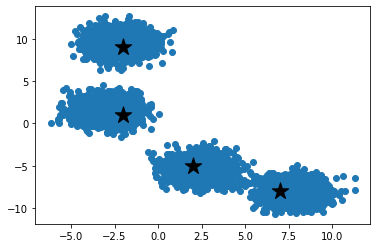

In [193]:
pyplot.scatter(x[:, 0], x[:, 1])
pyplot.scatter(new_clusters[:, 0], new_clusters[:, 1], marker='*', s=300, c='black')
pyplot.show()

ValueError: 'c' argument has 150 elements, which is inconsistent with 'x' and 'y' with size 5000.

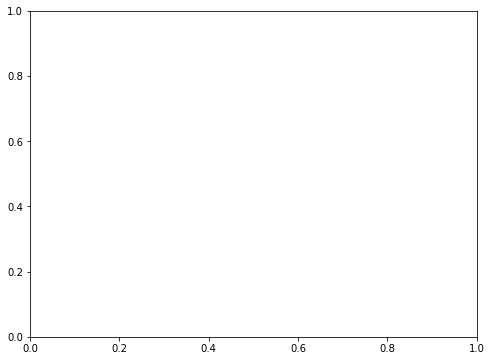

In [194]:
fig = plt.figure(figsize=(8,6))
plt.scatter(x[:,0], x[:,1], c=y)
plt.title("Dataset with 4 clusters")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

In [195]:
def plot_in_col(x, number_of_clusters, p, new_clusters):
    for i in range(number_of_clusters):
        col_points = np.array([x[n] for n in range(len(x)) if p[n] == i])
        pyplot.scatter(col_points[:, 0], col_points[:, 1], s=10)
    pyplot.scatter(new_clusters[:, 0], new_clusters[:, 1], marker='*', s=300, c='black')
    pyplot.show()

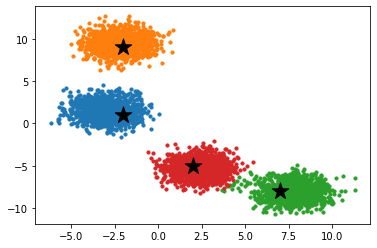

In [196]:
plot_in_col(x, number_of_clusters, p, new_clusters)